In [1]:
import tensorflow as tf
import numpy as np

n_input = 28*28
n_L1 = 300
n_L2 = 100
n_output = 10

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


2022-09-30 12:08:04.892746: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-30 12:08:04.971416: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
X_train.shape, y_train.shape # 면, 행, 열 순서

((60000, 28, 28), (60000,))

In [3]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

In [9]:
X_train.shape # 면, 행, 열, 높이 순서

(60000, 28, 28, 1)

In [10]:
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [11]:
X_valid.shape, X_train.shape

((5000, 28, 28, 1), (55000, 28, 28, 1))

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2, 2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu ), 
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(n_output, activation=tf.nn.softmax)
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

2022-09-30 12:08:06.325011: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_valid, y_valid))

Epoch 1/10
550/550 [==============================] - 5s 9ms/step - loss: 0.2704 - accuracy: 0.9196 - val_loss: 0.0906 - val_accuracy: 0.9724
Epoch 2/10
550/550 [==============================] - 5s 9ms/step - loss: 0.0909 - accuracy: 0.9732 - val_loss: 0.0597 - val_accuracy: 0.9824
Epoch 3/10
550/550 [==============================] - 5s 9ms/step - loss: 0.0630 - accuracy: 0.9811 - val_loss: 0.0543 - val_accuracy: 0.9832
Epoch 4/10
550/550 [==============================] - 6s 11ms/step - loss: 0.0491 - accuracy: 0.9849 - val_loss: 0.0477 - val_accuracy: 0.9858
Epoch 5/10
550/550 [==============================] - 5s 9ms/step - loss: 0.0380 - accuracy: 0.9883 - val_loss: 0.0464 - val_accuracy: 0.9868
Epoch 6/10
550/550 [==============================] - 5s 9ms/step - loss: 0.0319 - accuracy: 0.9897 - val_loss: 0.0421 - val_accuracy: 0.9892
Epoch 7/10
550/550 [==============================] - 5s 9ms/step - loss: 0.0252 - accuracy: 0.9922 - val_loss: 0.0447 - val_accuracy: 0.9868
Epoch

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print("Test Accuracy:{}".format(test_acc))

Test Accuracy:0.987500011920929


In [16]:
# 문제1. X_test의 5번 이미지 정답값 출력
y_test[5]

1

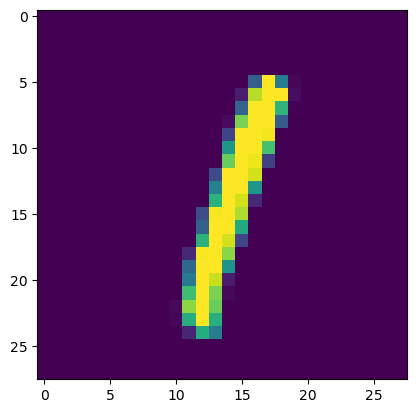

In [17]:
# 문제2. X_test의 5번 이미지를 matplotlib으로 시각화
import matplotlib.pyplot as plt
plt.imshow(X_test[5])

In [18]:
# 문제3. X_test의 5번 이미지를 추출하여 예측값을 출력하기
pred = model.predict(X_test[5].reshape(-1,28,28,1))
tf.argmax(pred, axis=1)

1/1 [==============================] - 0s 52ms/step


<tf.Tensor: shape=(1,), dtype=int64, numpy=array([1])>

In [19]:
import numpy as np
# model.predict(X_test[[5]]) 도 가능
model.predict(X_test[5:6]) # label 별 확률
# label 별 확률 중 가장 큰 것의 인덱스
pred = model.predict(X_test[5:6])
pred.argmax()

1/1 [==============================] - 0s 13ms/step


1

In [20]:
# Conv2D 안쓰고 학습하기 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0


In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # 첫번째 레이어는 무조건 input_shape 속성을 가져야 함.
    tf.keras.layers.Dense(128, activation='ReLU' ), 
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 858us/step - loss: 0.3174 - accuracy: 0.9081
Epoch 2/5
1875/1875 [==============================] - 2s 834us/step - loss: 0.1636 - accuracy: 0.9508
Epoch 3/5
1875/1875 [==============================] - 2s 856us/step - loss: 0.1283 - accuracy: 0.9612
Epoch 4/5
1875/1875 [==============================] - 2s 887us/step - loss: 0.1075 - accuracy: 0.9665
Epoch 5/5
1875/1875 [==============================] - 2s 991us/step - loss: 0.0938 - accuracy: 0.9707


In [24]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0) # loss와 metrics값 반환

print("Test Accuracy:{}".format(test_acc))

Test Accuracy:0.9746000170707703


In [25]:
print(y_test[5])
model.predict(X_test[[5]]).argmax()

1
1/1 [==============================] - 0s 122ms/step


1

## fashion_mnist

In [26]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0

In [27]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [28]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

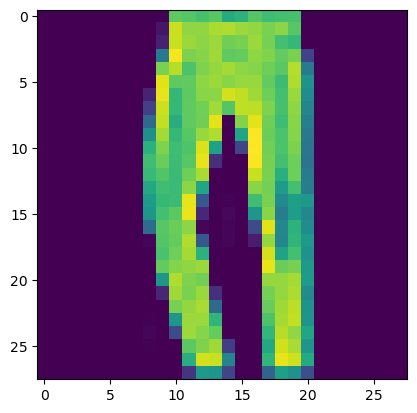

In [29]:
import matplotlib.pyplot as plt
plt.imshow(X_test[5])

In [30]:
# conv2D는 반드시 3차원 이미지를 원함.
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2, 2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='ReLU' ), 
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4681 - accuracy: 0.8332
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3155 - accuracy: 0.8876
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2724 - accuracy: 0.9009
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2444 - accuracy: 0.9106
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2223 - accuracy: 0.9179


In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0) # loss와 metrics값 반환

print("Test Accuracy:{}".format(test_acc))

Test Accuracy:0.9047999978065491


In [34]:
print(y_train[5])
model.predict(X_train[[5]]).argmax()

2
1/1 [==============================] - 0s 35ms/step


2

# VGG16 실습은 COLAB